In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

df = pd.read_csv('datasets/gym_members_exercise_tracking.csv')
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


### General Info Of The Dataframe

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Check NULL Values

In [62]:
# check null values
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### Check Duplicated Rows

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
highest_max_BPM = len(df.loc[df['Max_BPM'] == max(df['Max_BPM'])])
highest_max_BPM

26

### Workout Types

In [65]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [66]:
# gender
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

### Categorize People

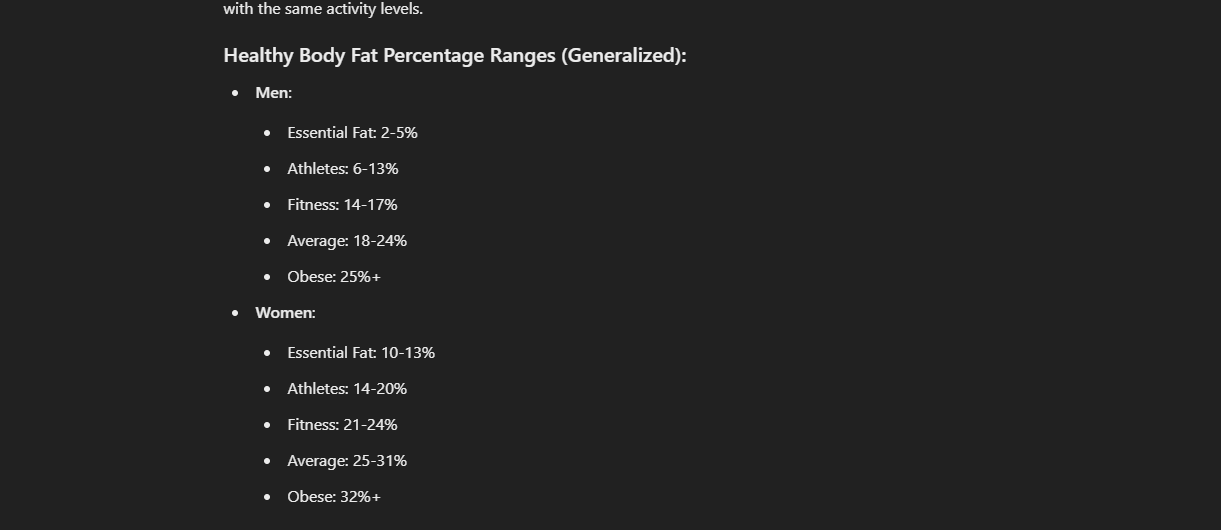

In [125]:
def categorize_fat(row):
    # Male
    if row['Gender'] == 'Male':
        if row['Fat_Percentage'] >= 2 and row['Fat_Percentage'] <= 5:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 6 and row['Fat_Percentage'] <= 13:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 17:
            return 'Lean'
        elif row['Fat_Percentage'] >= 18 and row['Fat_Percentage'] <= 24:
            return 'Average'
        else:
            return 'High Fat'
    # Female
    else:
        if row['Fat_Percentage'] >= 10 and row['Fat_Percentage'] <= 13:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 20:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 21 and row['Fat_Percentage'] <= 24:
            return 'Lean'
        elif row['Fat_Percentage'] >= 25 and row['Fat_Percentage'] <= 31:
            return 'Average'
        else:
            return 'High Fat'

df['Fat_category'] = df.apply(categorize_fat, axis=1) 
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
376,56,Male,125.5,1.80,189,131,73,1.26,817.0,Strength,20.9,2.7,4,2,38.73,Average
220,37,Female,72.9,1.76,192,121,52,1.21,732.0,Strength,27.5,1.9,3,2,23.53,Average
112,52,Male,85.5,1.82,174,154,57,1.78,1357.0,Yoga,14.9,3.5,4,3,25.81,Lean
74,41,Male,94.1,1.62,172,139,50,1.13,777.0,Cardio,23.4,3.1,4,2,35.86,Average
597,33,Female,56.4,1.54,165,155,63,1.06,822.0,Strength,29.2,1.5,3,1,23.78,Average
168,54,Female,72.3,1.78,163,149,72,1.27,852.0,Cardio,27.7,1.8,2,1,22.82,Average
311,58,Male,109.7,1.75,181,168,54,1.01,840.0,HIIT,22.1,2.7,2,1,35.82,Average
509,37,Female,55.6,1.57,182,123,53,0.97,597.0,Cardio,29.2,2.4,2,1,22.56,Average
447,45,Female,65.5,1.57,192,133,59,0.66,395.0,Cardio,34.3,2.3,2,1,26.57,High Fat
291,55,Male,128.4,1.68,178,165,52,1.13,923.0,Cardio,20.4,2.6,4,2,45.49,Average


In [68]:
df.loc[(df['Fat_Percentage'] > 6) & (df['Fat_Percentage'] < 13)].shape[0]

64

In [69]:
df['Fat_category'].value_counts()

Fat_category
High Fat      425
Average       375
Super Lean    154
Lean           19
Name: count, dtype: int64

### Pie Chart

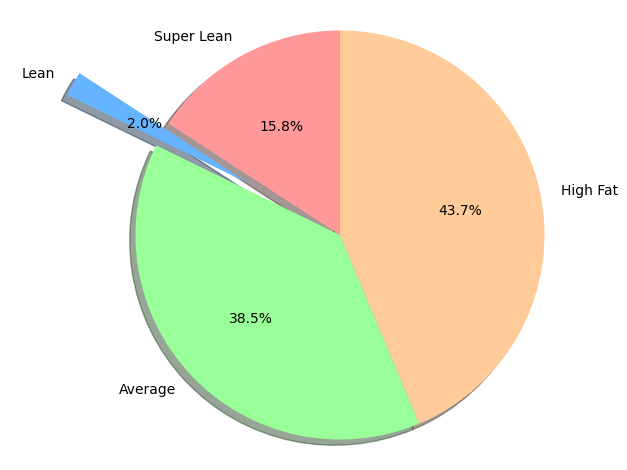

In [79]:
# Calculate counts for each category
super_lean = df.loc[df['Fat_category'] == 'Super Lean'].shape[0]
lean = df.loc[df['Fat_category'] == 'Lean'].shape[0]
average = df.loc[df['Fat_category'] == 'Average'].shape[0]
high_fat = df.loc[df['Fat_category'] == 'High Fat'].shape[0]

# Pie chart
labels = ['Super Lean', 'Lean', 'Average', 'High Fat']
sizes = [super_lean, lean, average, high_fat]
explodes = (0, 0.5, 0, 0)

# Add colors and explode for visualization
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [80]:
super_leans = df.loc[df['Fat_category'] == 'Super Lean'].shape[0]
leans = df.loc[df['Fat_category'] == 'Lean'].shape[0]
print(super_leans)
print(leans)

154
19


In [81]:
strength_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Strength'] / df['Session_Duration (hours)']).mean()
print("Strength : ", strength_avg_cal)

cardio_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Cardio'] / df['Session_Duration (hours)']).mean()
print("Cardio : ", cardio_avg_cal)

yoga_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Yoga'] / df['Session_Duration (hours)']).mean()
print("Yoga : ", yoga_avg_cal)

hiit_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'HIIT'] / df['Session_Duration (hours)']).mean()
print("HIIT : ", hiit_avg_cal)

Strength :  723.9950441252573
Cardio :  723.8479923442371
Yoga :  716.5192284403885
HIIT :  716.5150989407075


## SCATTER PLOTS

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

['Yoga' 'HIIT' 'Cardio' 'Strength']


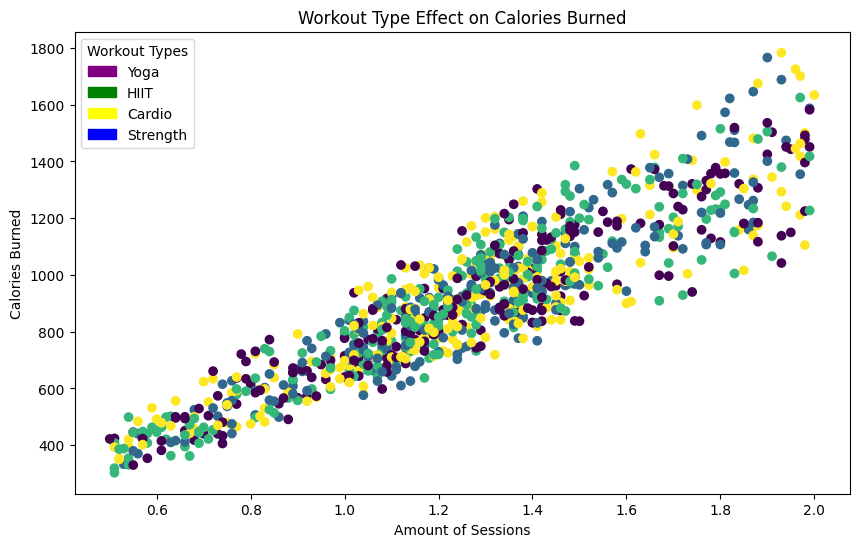

In [83]:
import matplotlib.patches as mpatches

# Define workout types and their corresponding colors
workout_types = df['Workout_Type'].unique()
print(workout_types)
workout_type_to_color = {wt: i for i, wt in enumerate(workout_types)}
t = df['Workout_Type'].map(workout_type_to_color)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], c=t, alpha=1)
# Add labels and title
plt.xlabel('Amount of Sessions')
plt.ylabel('Calories Burned')
plt.title('Workout Type Effect on Calories Burned')

# Create a legend
handles = [
    mpatches.Patch(color="purple", label="Yoga"),
    mpatches.Patch(color="green", label="HIIT"),
    mpatches.Patch(color="yellow", label="Cardio"),
    mpatches.Patch(color="blue", label="Strength")
]

plt.legend(handles=handles, title="Workout Types", loc="upper left")  # Customize title and position

# Show the plot
plt.show()

In [126]:
# change classification into integers
def change_category_int(row):
    if row == 'Super Lean':
        return 0
    elif row == 'Lean':
        return 1
    elif row == 'Average':
        return 2
    else:
        return 3

df['Fat_category'] = df['Fat_category'].apply(change_category_int)
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
694,45,Female,57.2,1.55,194,121,58,1.67,909.0,Cardio,18.4,2.7,5,3,23.81,0
97,58,Male,103.5,1.66,172,168,61,1.33,1106.0,Cardio,24.6,3.1,3,1,37.56,3
561,36,Male,95.8,1.86,193,129,65,1.37,972.0,HIIT,21.2,3.2,3,1,27.69,2
953,50,Female,67.9,1.77,171,164,73,1.03,760.0,Yoga,33.0,2.4,3,2,21.67,3
952,55,Male,69.9,1.81,179,167,57,1.20,992.0,Strength,20.2,2.1,4,2,21.34,2
958,34,Female,66.5,1.69,191,157,52,0.81,636.0,Cardio,28.1,2.3,3,1,23.28,2
224,50,Male,96.7,1.72,188,125,62,1.46,903.0,Strength,25.7,2.7,3,2,32.69,3
173,49,Female,42.0,1.52,171,130,70,1.10,644.0,HIIT,28.8,2.2,3,1,18.18,2
99,24,Female,60.1,1.79,170,165,63,1.97,1625.0,Cardio,15.9,2.7,4,3,18.76,0
788,25,Male,95.6,1.90,190,160,72,1.47,1294.0,Cardio,23.8,2.4,4,2,26.48,2


In [127]:
# change gender class to int
def change_category_int(row):
    if row == 'Male':
        return 1
    else:
        return 0

df['Gender'] = df['Gender'].apply(change_category_int)
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
170,59,1,89.4,1.72,188,152,67,1.08,813.0,Yoga,24.5,3.2,3,1,30.22,3
279,38,1,91.5,1.77,178,140,74,0.80,616.0,Yoga,26.7,3.4,2,1,29.21,3
851,41,0,66.8,1.74,164,149,57,1.34,898.0,Yoga,29.2,2.3,3,1,22.06,2
760,46,0,66.5,1.73,163,142,56,1.11,709.0,Yoga,34.7,2.0,3,1,22.22,3
748,48,0,68.2,1.69,170,159,73,0.75,537.0,HIIT,28.4,2.5,3,1,23.88,2
525,33,0,59.0,1.67,175,124,55,0.90,558.0,Cardio,33.7,1.9,3,1,21.16,3
697,56,1,93.6,1.66,177,151,52,1.37,1024.0,Strength,29.0,2.2,2,1,33.97,3
822,21,0,72.6,1.68,162,127,70,1.19,756.0,Cardio,34.2,1.8,3,2,25.72,3
250,36,1,99.9,1.99,189,147,73,1.33,1075.0,Yoga,20.9,2.5,3,1,25.23,2
677,40,0,52.6,1.66,198,120,71,1.27,762.0,Strength,32.9,1.7,3,2,19.09,3


In [102]:
# splitting variables
x = df.iloc[:, :15]
y = df.iloc[:, 15]
x

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [103]:
# Splitting data into Train/Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [105]:
# Model
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

ValueError: could not convert string to float: 'Female'